In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings # To get rid of convergence warnings
filterwarnings('ignore') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/SML Datasets/heart1.csv")
df.head()

,age,sex,cpt,rbp,sc,fbs,rer,mhr,eia,opst,dests,nmvcf,thal,a1p2
0,29,1,2,130,204,0,2,202,0,0.0,1,0,3,1
1,34,0,2,118,210,0,0,192,0,0.7,1,0,3,1
2,34,1,1,118,182,0,2,174,0,0.0,1,0,3,1
3,35,1,4,120,198,0,0,130,1,1.6,2,0,7,2
4,35,1,4,126,282,0,2,156,1,0.0,1,0,7,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     270 non-null    int64  
 1   sex     270 non-null    int64  
 2   cpt     270 non-null    int64  
 3   rbp     270 non-null    int64  
 4   sc      270 non-null    int64  
 5   fbs     270 non-null    int64  
 6   rer     270 non-null    int64  
 7   mhr     270 non-null    int64  
 8   eia     270 non-null    int64  
 9   opst    270 non-null    float64
 10  dests   270 non-null    int64  
 11  nmvcf   270 non-null    int64  
 12  thal    270 non-null    int64  
 13  a1p2    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
df["a1p2"].value_counts()

1    150
2    120
Name: a1p2, dtype: int64

In [ ]:
df.isnull().sum()

age      0
sex      0
cpt      0
rbp      0
sc       0
fbs      0
rer      0
mhr      0
eia      0
opst     0
dests    0
nmvcf    0
thal     0
a1p2     0
dtype: int64

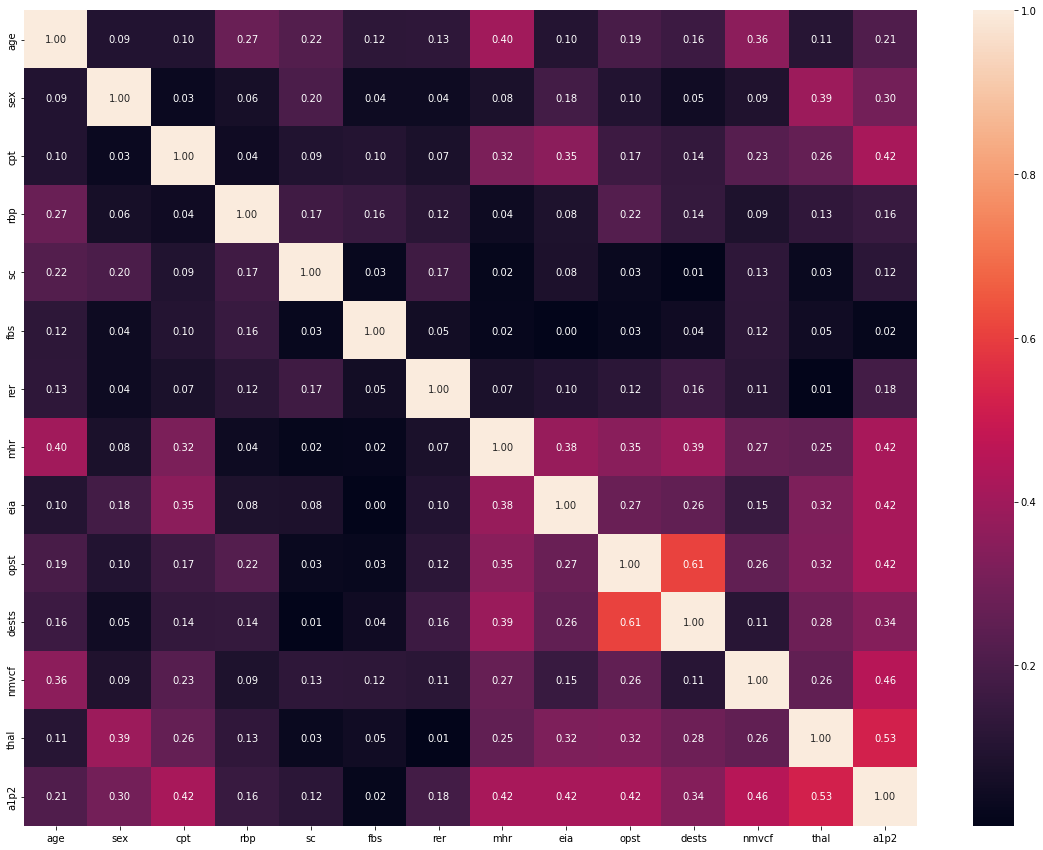

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(np.abs(df.corr()), annot=True, fmt=".2f")
plt.show()

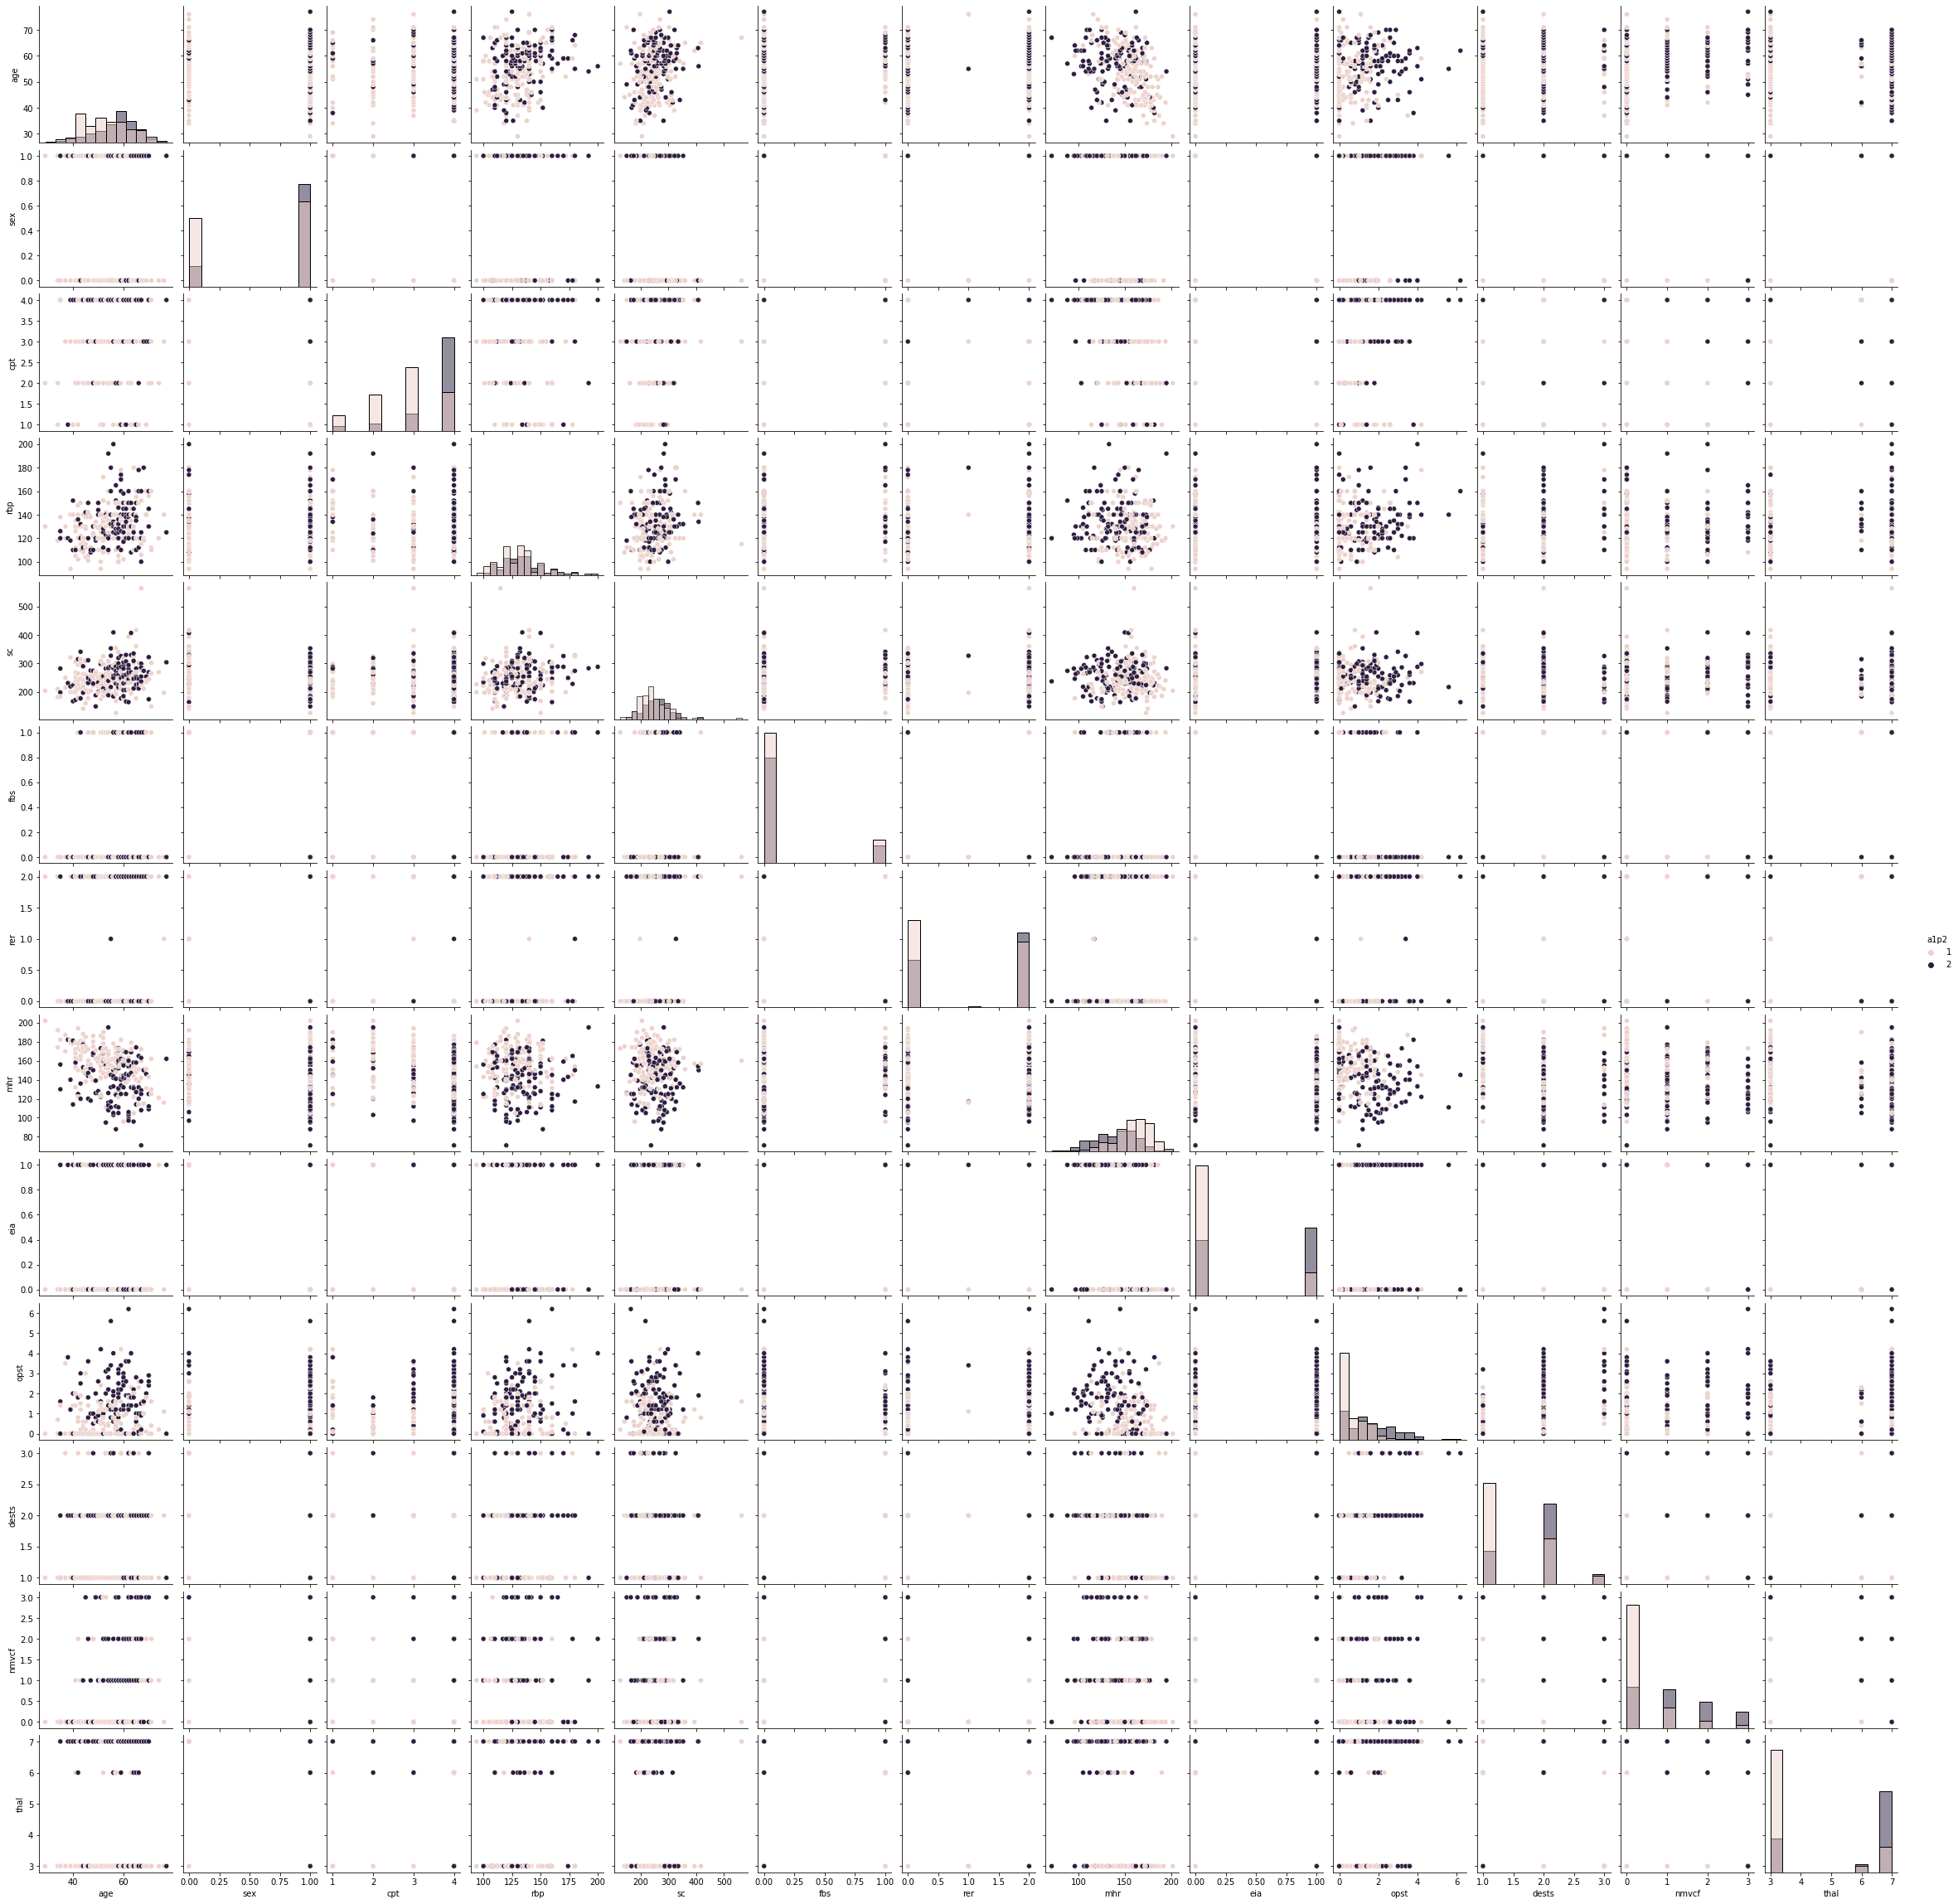

In [ ]:
sns.pairplot(df,hue='a1p2',diag_kind='hist')


In [ ]:

from sklearn.preprocessing import StandardScaler       # standardize data


from sklearn.metrics import accuracy_score             # grade the results'
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
train, test = train_test_split(df, test_size=0.3 , random_state=1)


In [ ]:
X_train = train.drop("a1p2",axis=1)
y_train = train["a1p2"]
X_test = test.drop("a1p2",axis=1)
y_test = test["a1p2"]

In [ ]:
X_train.shape, X_test.shape #finding shape of training and testing data of X attributes


((189, 13), (81, 13))

In [ ]:
y_train.shape, y_test.shape  #finding shape of training and testing data of Y attribute


((189,), (81,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
# create the classifier and train it
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth ,random_state=0)
    tree.fit(X_train,y_train)

    y_pred = tree.predict(X_test)  # now try with the test data


    print('*************')
    print("Results for depth =",depth)
# Note that this only counts the samples where the predicted value was wrong
    print('Misclassified samples: %d' % (y_test != y_pred).sum())  # how'd we do?
    print('Accuracy: %.7f' % accuracy_score(y_test, y_pred))

    # vstack puts first array above the second in a vertical stack
    # hstack puts first array to left of the second in a horizontal stack
    # NOTE the double parens!
    X_combined = np.vstack((X_train, X_test))  # doing combo
    y_combined = np.hstack((y_train, y_test))
    print('Number in combined ', len(y_combined))

# we did the stack so we can see how the combination of test and train data did
    y_combined_pred = tree.predict(X_combined)
    print('Misclassified combined samples: %d' % \
                                    (y_combined != y_combined_pred).sum())
    print('Combined Accuracy: %.7f' % accuracy_score(y_combined, y_combined_pred))
    export_graphviz(tree,out_file='tree1.dot',
                feature_names=['age','sex','cpt','rbp','sc','fbs','rer','mhr','ela','opst','dests','nmvcf','thal'])
    #testing = input()
    print('*************')


*************
Results for depth = 1
Misclassified samples: 24
Accuracy: 0.7037037
Number in combined  270
Misclassified combined samples: 64
Combined Accuracy: 0.7629630
*************
*************
Results for depth = 2
Misclassified samples: 24
Accuracy: 0.7037037
Number in combined  270
Misclassified combined samples: 64
Combined Accuracy: 0.7629630
*************
*************
Results for depth = 3
Misclassified samples: 20
Accuracy: 0.7530864
Number in combined  270
Misclassified combined samples: 51
Combined Accuracy: 0.8111111
*************
*************
Results for depth = 4
Misclassified samples: 19
Accuracy: 0.7654321
Number in combined  270
Misclassified combined samples: 41
Combined Accuracy: 0.8481481
*************
*************
Results for depth = 5
Misclassified samples: 23
Accuracy: 0.7160494
Number in combined  270
Misclassified combined samples: 34
Combined Accuracy: 0.8740741
*************
*************
Results for depth = 6
Misclassified samples: 19
Accuracy: 0.765432

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for trees in [1,2,3,4,5,6,7,8,9,10,11,12,15, 101]:
    print('*************')
    print("Number of trees: ", trees)
        # create the classifier and train it
        # n_estimators is the number of trees in the forest
        # the entropy choice grades based on information gained
        # n_jobs allows multiple processors to be used
    forest = RandomForestClassifier(criterion='entropy', n_estimators=trees, \
                                                random_state=1, n_jobs=-1)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_test)  # see how we do on the test data
    print('Number in test ', len(y_test))
    print('Misclassified samples: %d' % (y_test != y_pred).sum())

    print('Accuracy: %.7f \n' % accuracy_score(y_test, y_pred))

    # combine the train and test data
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    print('Number in combined ', len(y_combined))

    # see how we do on the combined data
    y_combined_pred = forest.predict(X_combined)
    print('Misclassified samples: %d' % (y_combined != y_combined_pred).sum())
    print('Combined Accuracy: %.7f' % \
            accuracy_score(y_combined, y_combined_pred))
    

*************
Number of trees:  1
Number in test  81
Misclassified samples: 21
Accuracy: 0.7407407 

Number in combined  270
Misclassified samples: 45
Combined Accuracy: 0.8333333
*************
Number of trees:  2
Number in test  81
Misclassified samples: 19
Accuracy: 0.7654321 

Number in combined  270
Misclassified samples: 43
Combined Accuracy: 0.8407407
*************
Number of trees:  3
Number in test  81
Misclassified samples: 20
Accuracy: 0.7530864 

Number in combined  270
Misclassified samples: 28
Combined Accuracy: 0.8962963
*************
Number of trees:  4
Number in test  81
Misclassified samples: 17
Accuracy: 0.7901235 

Number in combined  270
Misclassified samples: 27
Combined Accuracy: 0.9000000
*************
Number of trees:  5
Number in test  81
Misclassified samples: 17
Accuracy: 0.7901235 

Number in combined  270
Misclassified samples: 21
Combined Accuracy: 0.9222222
*************
Number of trees:  6
Number in test  81
Misclassified samples: 18
Accuracy: 0.7777778 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.7777777777777778


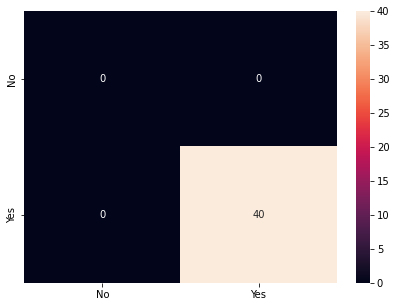

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
import sklearn.metrics as metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:

from sklearn.ensemble import BaggingClassifier

baggingClassifier1 = BaggingClassifier(base_estimator=tree, n_estimators=50,random_state=1)

baggingClassifier1 = baggingClassifier1.fit(X_train, y_train)


0.8271604938271605


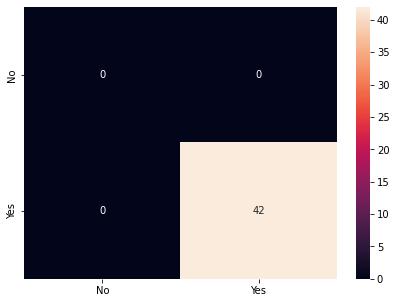

In [ ]:
y_predict = baggingClassifier1.predict(X_test)

print(baggingClassifier1.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(n_estimators=10, random_state=1)
adaBoost = adaBoost.fit(X_train, y_train)


0.7777777777777778


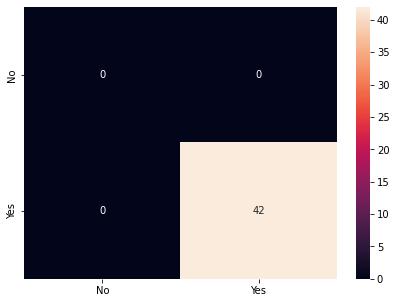

In [ ]:
y_predict = adaBoost.predict(X_test)
print(adaBoost.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoost = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gradientBoost = gradientBoost.fit(X_train, y_train)

0.7777777777777778


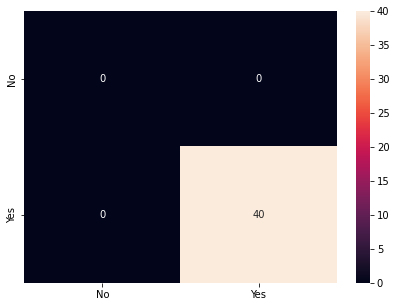

In [ ]:
y_predict = y_predict = gradientBoost.predict(X_test)
print(gradientBoost.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])



plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')